In [100]:
import pandas as pd
from os.path import join
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
sns.set_context('talk')
%matplotlib inline

In [101]:
## SETTINGS
data_dir = '../../data/raw/temp_sensors/pilot/'
means = {}

In [102]:
def make_plots_and_means(dfs,experiment_times,site_str,means=None,room_temp=True):
    if means==None:
        means = {}
        
    means[site_str] = {}
    n_ex = len(experiment_times)

    pretty_metrics = ['Temperature','RH']

    for mi,metric in enumerate(['temp','rh']):
        means[site_str][metric] = {}
        means[site_str][metric]['individ'] = {}
        means[site_str][metric]['room'] = {}

        fig,ax = plt.subplots(n_ex,2,figsize = (12,n_ex*6))

        for ei,e in enumerate(experiment_times):
            for gi,g in enumerate(['control','treatment']):
                if len(experiment_times) > 1:
                    this_ax = ax[ei,gi]
                    first_ax = ax[0,0]
                    second_ax = ax[0,1]
                    last_ax = ax[n_ex-1,1]
                else:
                    this_ax = ax[gi]
                    first_ax = ax[0]
                    second_ax = ax[1]
                    last_ax = second_ax
                if ei == 0:
                    means[site_str][metric]['individ'][g] = []
                    means[site_str][metric]['room'][g] = []

                for si in range(6):
                    data = dfs[g][si].loc[e[0]:e[1]]

                    # for all individual sensors
                    metric_df = data.iloc[:,mi+1]
                    means[site_str][metric]['individ'][g].append(metric_df.mean())
                    metric_df.name = 'Sensor {}'.format(si+1)
                    metric_df.plot(ax=this_ax)

                # for main room sensor
                if room_temp:
                    data = dfs[g][6].loc[e[0]:e[1]]
                    metric_df = data.iloc[:,mi]
                    means[site_str][metric]['room'][g].append(metric_df.mean())
                    metric_df.name = 'Room Temp Sensor'
                    metric_df.plot(ax=this_ax,style='--')

        first_ax.set_title('Control')
        second_ax.set_title('Treatment')
        last_ax.legend(loc='lower right')

        fig.suptitle('{} Pilot {} Measurements, {} Sessions'.format(
            site_str.title(),pretty_metrics[mi],n_ex),fontsize=18)
        fig.tight_layout()
        fig.subplots_adjust(top=.95)
        fig.savefig('../../results/figures/pilot/pilot_{}s_{}.png'.format(metric,site_str))

        for g in ['control','treatment']:
            means[site_str][metric]['individ'][g] = np.array(means[site_str][metric]['individ'][g]).mean()
            means[site_str][metric]['room'][g] = np.array(means[site_str][metric]['room'][g]).mean()

    return means


## Berkeley

In [103]:
berk_experiment_times = [
    ('18','1122','1233'),
    ('18','1422','1530'),
    ('19','0931','1040'),
    ('19','1122','1233'),
    ('20','1026','1134'),
    ('20','1224','1335')
]

####
berk_times = [(pd.to_datetime('201709{}T{}'.format(i[0],i[1])),
          pd.to_datetime('201709{}T{}'.format(i[0],i[2]))) for i in berk_experiment_times]

In [104]:
## Load DFs
berk_dfs = {'treatment':[],
      'control':[]}
for gi,g in enumerate(['control','treatment']):
    for si in range(1,7):
        berk_dfs[g].append(
            pd.read_csv(join(data_dir,'berkeley','{}_{}.csv'.format(g,si)),skiprows=1,index_col = 1, parse_dates = True))
    berk_dfs[g].append(
        pd.read_excel(join(data_dir,'berkeley','{}_main.xls'.format(g)),sheetname='Records',parse_dates=True,index_col=0))
        

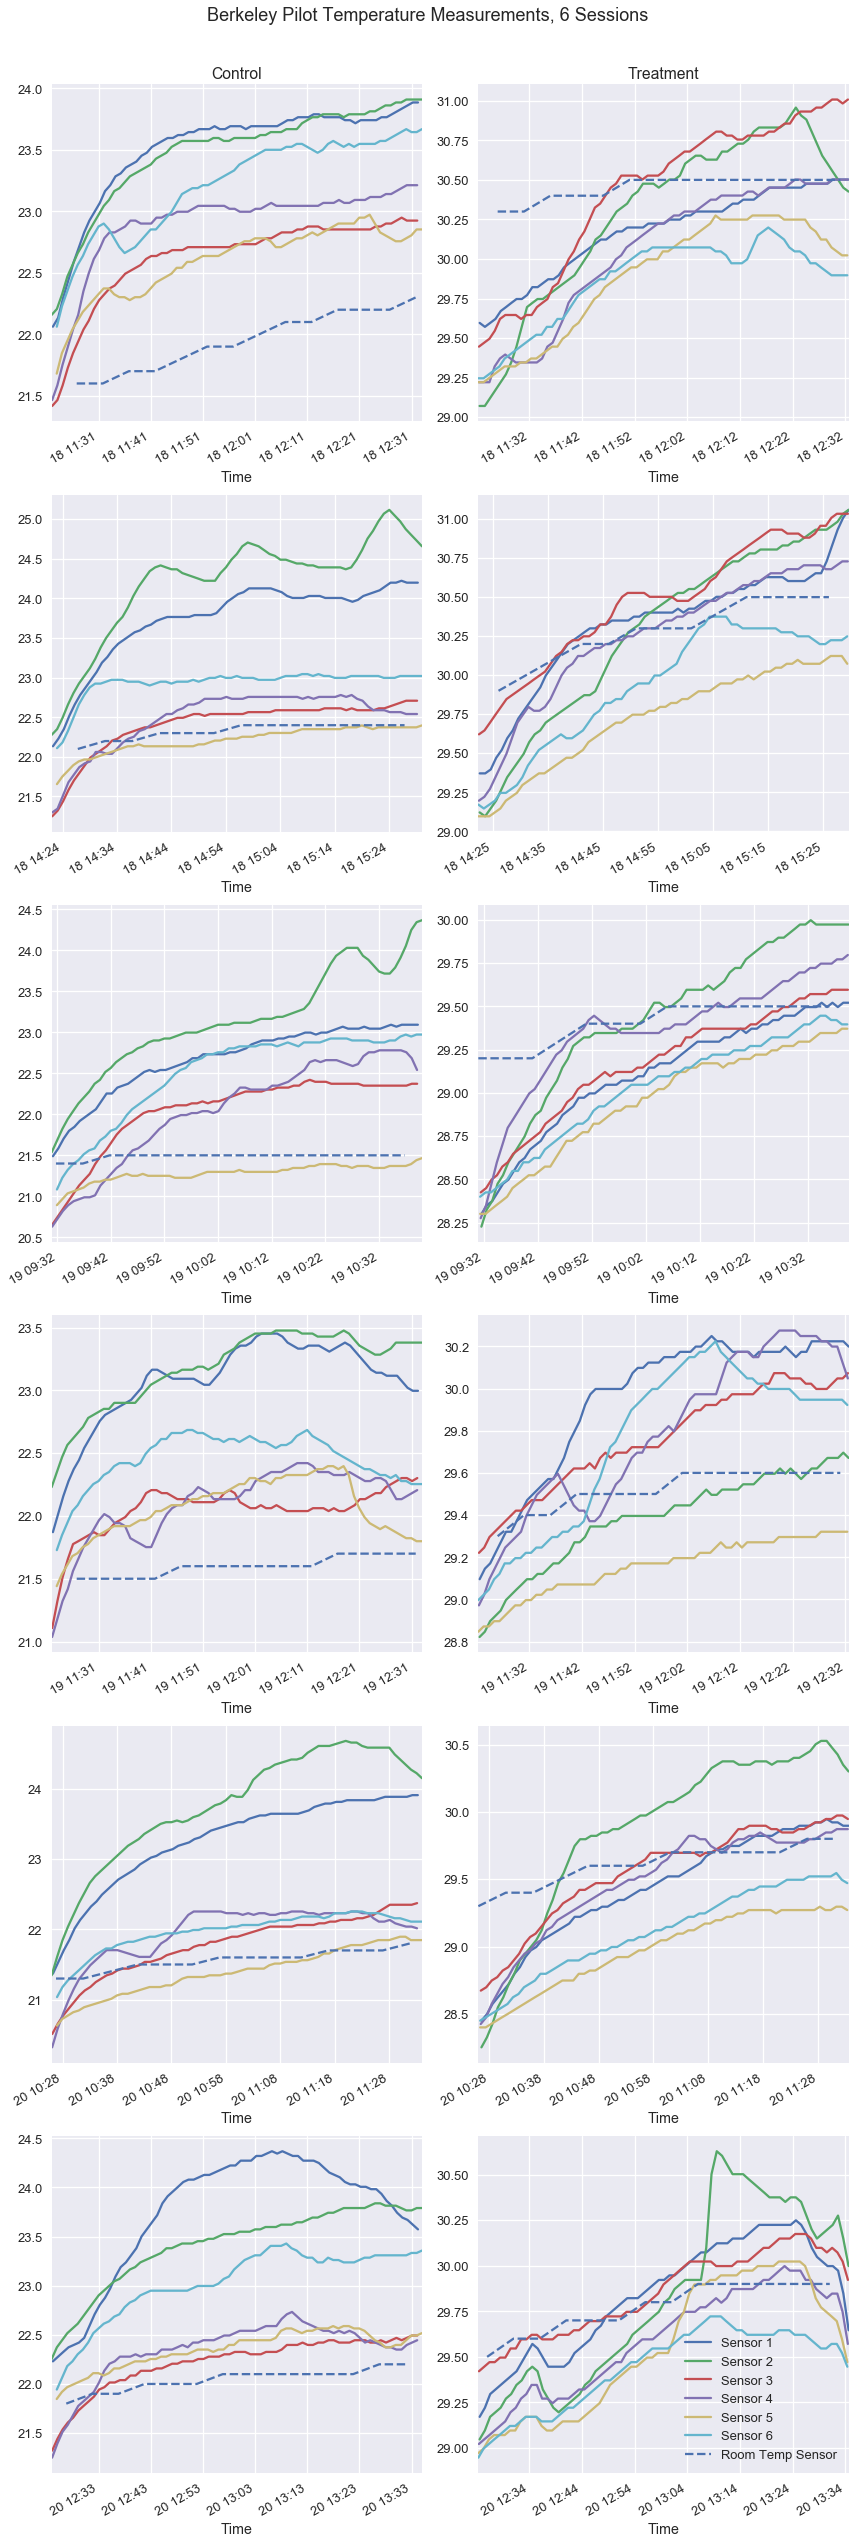

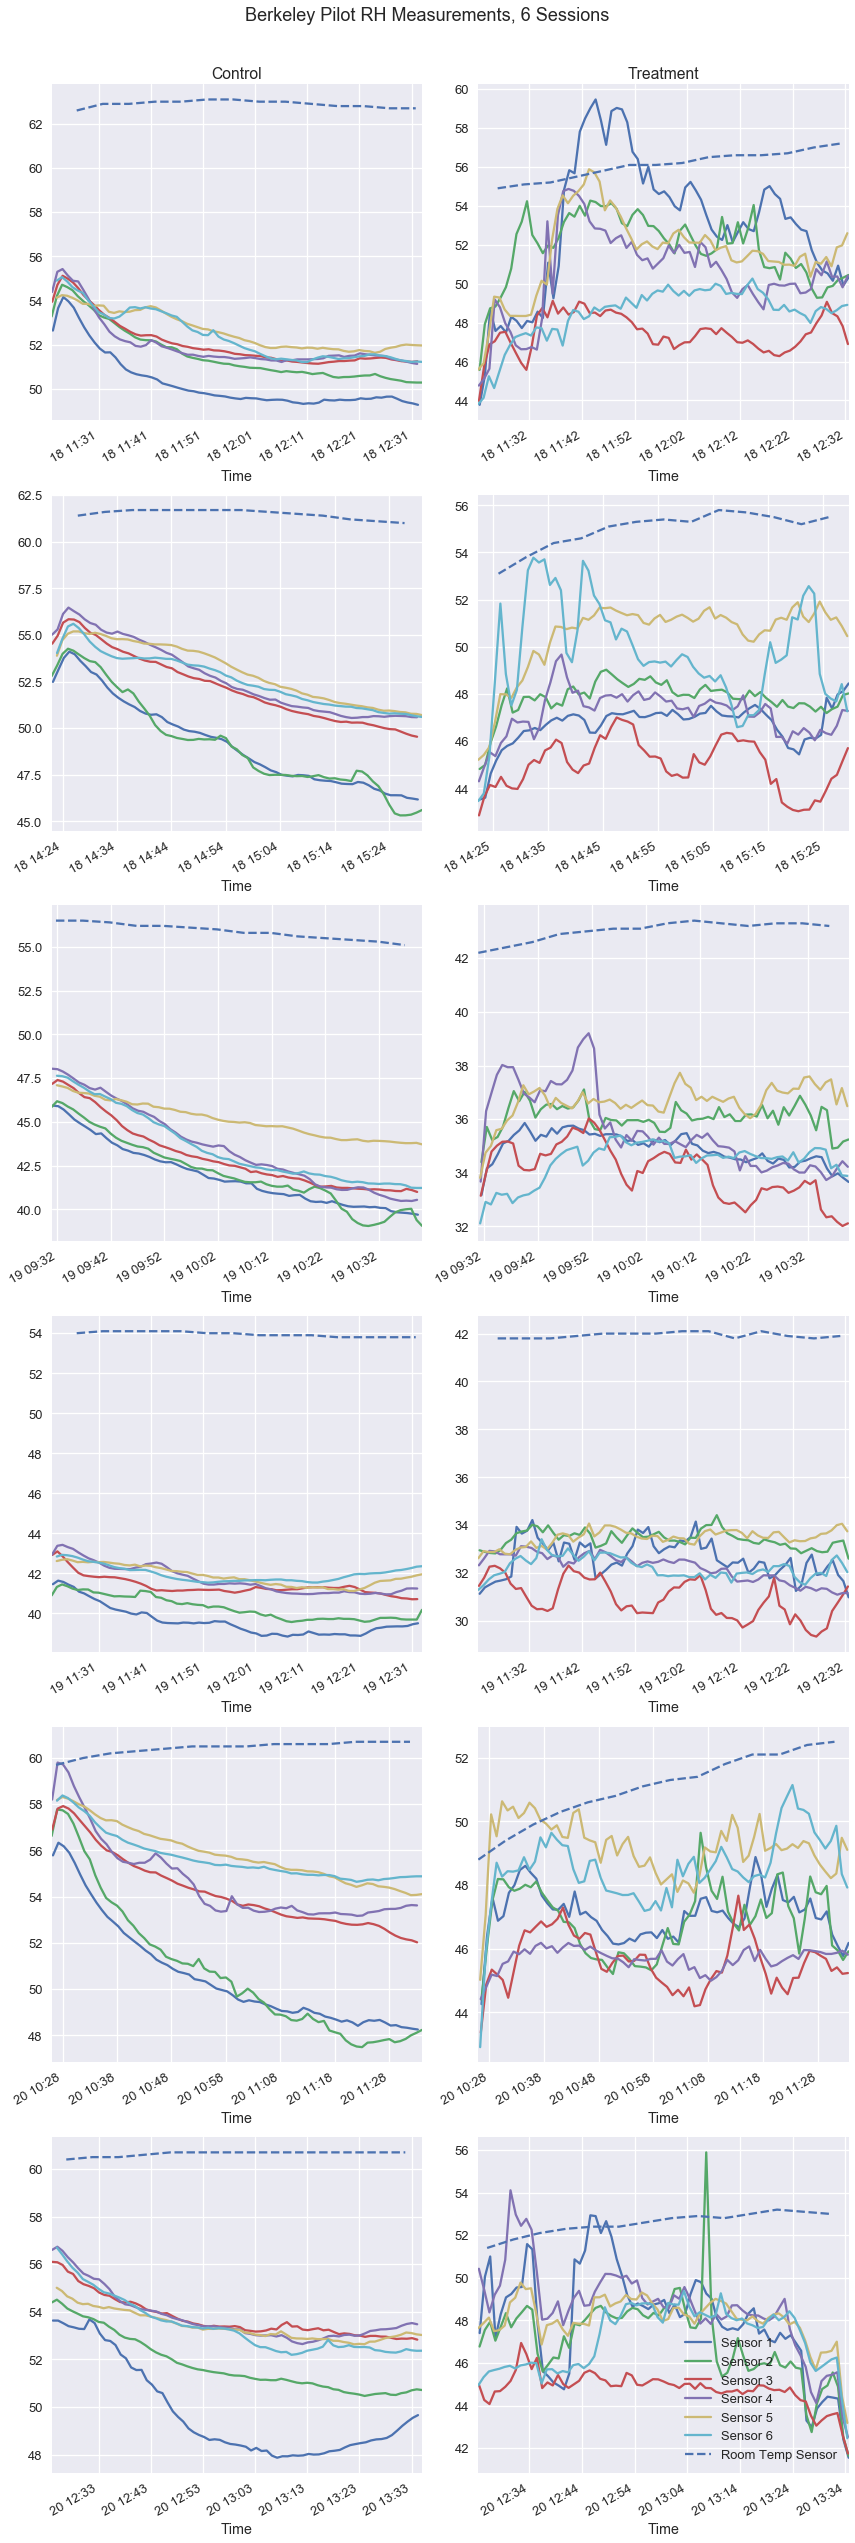

In [105]:
means = make_plots_and_means(berk_dfs,berk_times,'berkeley',room_temp=True)

## Busara

In [106]:
bus_experiment_times = [
    ('15','1130','1325'),
    ('14','1014','1146')
#     ('13','1059','1250')
]

####
bus_times = [(pd.to_datetime('201709{}T{}'.format(i[0],i[1])),
          pd.to_datetime('201709{}T{}'.format(i[0],i[2]))) for i in bus_experiment_times]

In [107]:
## Load DFs
bus_dfs = {'treatment':[],
      'control':[]}
for gi,g in enumerate(['control','treatment']):
    base_dir = join(data_dir,'busara')
    if g == 'control':
        g_alt = 'Cool'
        g_num = 2
        in_dir = join(base_dir,'20170915_Room2_Cool')
    else:
        g_alt = 'Warm'
        g_num = 1
    in_dir = join(base_dir,'20170915_Room{}_{}'.format(g_num,g_alt))
    for si in range(1,7):
        bus_dfs[g].append(
            pd.read_csv(join(in_dir,'20170915_Temp_{}{}.csv'.format(g_alt[0],si)),skiprows=1,index_col = 1, parse_dates = True))

/Users/ianbolliger/anaconda/envs/cooking_people/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice.
/Users/ianbolliger/anaconda/envs/cooking_people/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


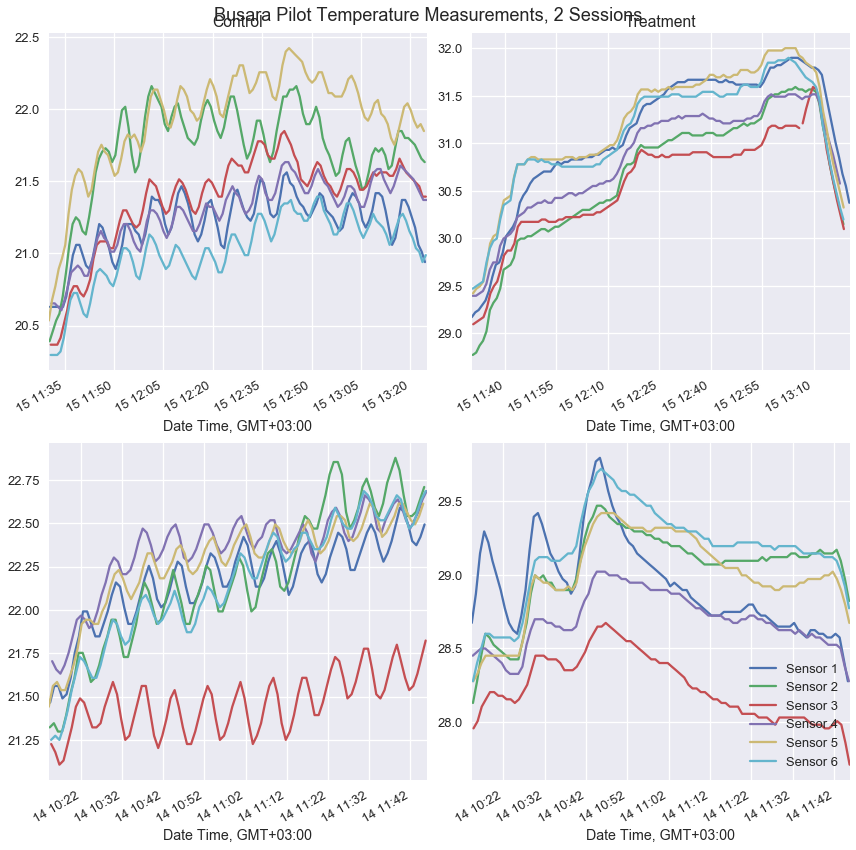

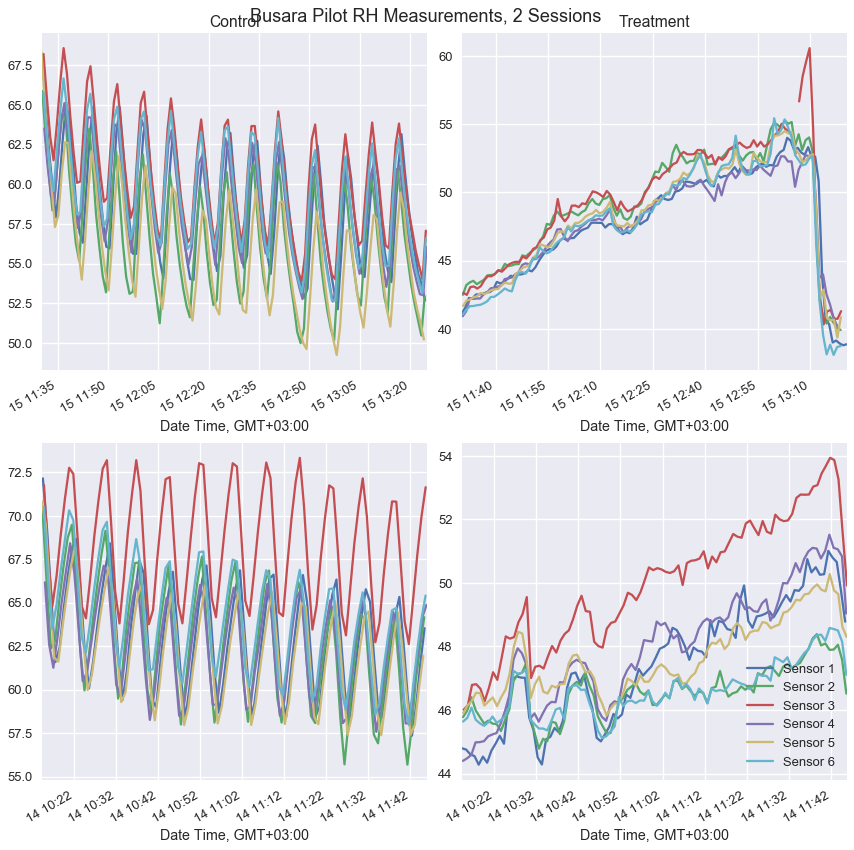

In [108]:
means = make_plots_and_means(bus_dfs, bus_times, 'busara', means=means, room_temp=False)

## All means

In [109]:
means_dicts = {}
mean_dict = means['berkeley']
means_berk_room = {'temp_control':mean_dict['temp']['room']['control'],
                   'temp_treatment':mean_dict['temp']['room']['treatment'],
                   'rh_control':mean_dict['rh']['room']['control'],
                   'rh_treatment':mean_dict['rh']['room']['treatment']}
means_berk_indiv = {'temp_control':mean_dict['temp']['individ']['control'],
                   'temp_treatment':mean_dict['temp']['individ']['treatment'],
                   'rh_control':mean_dict['rh']['individ']['control'],
                   'rh_treatment':mean_dict['rh']['individ']['treatment']}
mean_dict = means['busara']
means_bus_room = {'temp_control':mean_dict['temp']['individ']['control'],
                   'temp_treatment':mean_dict['temp']['individ']['treatment'],
                   'rh_control':mean_dict['rh']['individ']['control'],
                   'rh_treatment':mean_dict['rh']['individ']['treatment']}

pd.DataFrame({'Berkeley Room Temp':means_berk_room,
             'Berkeley Individual Sensors':means_berk_indiv,
             'Busara Individual Sensors':means_bus_room}).T

,rh_control,rh_treatment,temp_control,temp_treatment
Berkeley Individual Sensors,48.986312,43.412595,22.670668,29.695210
Berkeley Room Temp,59.214103,49.937821,21.826465,29.839103
Busara Individual Sensors,61.012701,48.028235,21.761850,29.878418


In [110]:
means_dicts = {}
mean_dict = means['berkeley']
means_berk_room = {'temp_control':mean_dict['temp']['room']['control'],
                   'temp_treatment':mean_dict['temp']['room']['treatment'],
                   'rh_control':mean_dict['rh']['room']['control'],
                   'rh_treatment':mean_dict['rh']['room']['treatment']}
means_berk_indiv = {'temp_control':mean_dict['temp']['individ']['control'],
                   'temp_treatment':mean_dict['temp']['individ']['treatment'],
                   'rh_control':mean_dict['rh']['individ']['control'],
                   'rh_treatment':mean_dict['rh']['individ']['treatment']}
mean_dict = means['busara']
means_bus_room = {'temp_control':mean_dict['temp']['individ']['control'],
                   'temp_treatment':mean_dict['temp']['individ']['treatment'],
                   'rh_control':mean_dict['rh']['individ']['control'],
                   'rh_treatment':mean_dict['rh']['individ']['treatment']}

pd.DataFrame({'Berkeley Room Temp':means_berk_room,
             'Berkeley Individual Sensors':means_berk_indiv,
             'Busara Individual Sensors':means_bus_room}).T

,rh_control,rh_treatment,temp_control,temp_treatment
Berkeley Individual Sensors,48.986312,43.412595,22.670668,29.695210
Berkeley Room Temp,59.214103,49.937821,21.826465,29.839103
Busara Individual Sensors,61.012701,48.028235,21.761850,29.878418
